In [ ]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import typing
import warnings
warnings.filterwarnings('ignore')

# Activity 1

In [ ]:
# Lennard-Jones potential function
def lennard_jones(r):
    return 1 / r**12 - 2 / r**6

# Calculate the potential energy for a cluster of atoms


def potential_energy(coordinates):
    energy = 0
    n = len(coordinates)
    for i in range(n):
        for j in range(i + 1, n):
            dist = np.linalg.norm(coordinates[i] - coordinates[j])
            energy += lennard_jones(dist)
    return energy

# Objective function for minimization (negative potential energy for maximization)


def objective_function(coords):
    coords = coords.reshape(-1, 3)  # Reshape coordinates to an array
    return potential_energy(coords)

# Function to minimize potential energy using Nelder-Mead


def minimize_energy(n_atoms):
    # Initial guess for the coordinates of the atoms
    # First atom at (0, 0, 0), second atom at (0, 0, z)
    initial_guess = [0, 0, 0, 0, 0, np.random.uniform(-1, 1)]

    # Generate random initial positions for the remaining atoms after the first two fixed atoms
    for _ in range(n_atoms - 2):
        initial_guess.extend(np.random.uniform(-1, 1, 3))

    min_energy = float('inf')
    min_coords = None
    steps_required = 0

    # Try several initial guesses to find the absolute minimum
    for _ in range(1000):
        # Random initial guess for the z-coordinate of the second atom
        initial_guess = [0, 0, 0, 0, 0, np.random.uniform(-1, 1)]

        # Generate random initial positions for the remaining atoms after the first two fixed atoms
        for _ in range(n_atoms - 2):
            initial_guess.extend(np.random.uniform(-1, 1, 3))

        result = minimize(objective_function, np.array(
            initial_guess), method='Nelder-Mead')
        energy = result.fun
        if energy < min_energy:
            min_energy = energy
            min_coords = result.x.reshape(-1, 3)
            # Fix the first two coordinates as (0, 0, 0) and (0, 0, z)
            min_coords[0] = [0, 0, 0]
            # Fixing z-coordinate to the optimized value
            min_coords[1] = [0, 0, min_coords[1][2]]
            steps_required = result.nit  # Number of iterations/steps required

        # Generate a new set of random initial positions for the remaining atoms
        initial_guess = [0, 0, 0, 0, 0, np.random.uniform(-1, 1)]
        for _ in range(n_atoms - 2):
            initial_guess.extend(np.random.uniform(-1, 1, 3))

    return min_energy, min_coords, steps_required


# Call the function to minimize energy for n = 5 atoms
n_atoms = [2, 3, 4, 5]

for n in n_atoms:
    min_energy, min_coords, steps = minimize_energy(n)
    print(f"The minimal energy for n = {n} is: {round((min_energy),1)}")
    print(f"Number of steps required: {steps}")
    print("Coordinates of the atoms at minimal energy:")
    print(min_coords)
    print('\n')

The minimal energy for n = 2 is: -1.0
Number of steps required: 115
Coordinates of the atoms at minimal energy:
[[ 0.          0.          0.        ]
 [ 0.          0.         -0.99005483]]


The minimal energy for n = 3 is: -3.0
Number of steps required: 656
Coordinates of the atoms at minimal energy:
[[ 0.          0.          0.        ]
 [ 0.          0.         -0.67471358]
 [-0.87314233  0.31678441 -0.17891712]]


The minimal energy for n = 4 is: -6.0
Number of steps required: 1377
Coordinates of the atoms at minimal energy:
[[ 0.          0.          0.        ]
 [ 0.          0.          0.91087615]
 [-0.81056458  0.16555931  0.40772695]
 [-0.09488618  0.86386509  0.39462811]]


The minimal energy for n = 5 is: -9.1
Number of steps required: 2136
Coordinates of the atoms at minimal energy:
[[ 0.          0.          0.        ]
 [ 0.          0.         -1.00140129]
 [-0.73215961  0.47657359 -0.51675744]
 [-0.68387323 -0.52371606 -0.51468289]
 [-0.95477408 -0.03374902  0.31137

#### **Explanation:**

1. **Minimal Energy for Different Cluster Sizes (n_atoms)**:
   - As the number of atoms in the cluster increases (from 2 to 5 atoms), the minimal energy becomes more negative. This trend is consistent with the behavior of Lennard-Jones potential, where lower energy corresponds to more stable configurations of atoms.
  
2. **Number of Steps Required**:
   - The number of steps needed to find the minimum energy configurations increases significantly as the number of atoms in the cluster grows. This increase is expected because as the number of atoms increases, the search space for finding the optimal arrangement becomes more complex. The optimization algorithm explores a larger configuration space to locate the minimum energy configuration.

3. **Coordinates of the Atoms at Minimal Energy**:
   - The coordinates obtained represent the spatial positions of atoms in the cluster at their minimal energy configuration. Each row in the coordinates matrix corresponds to the position of an atom in 3D space (x, y, z).

4. **Optimization Method Used (Nelder-Mead)**:
   - The code utilizes the Nelder-Mead optimization method to find the minimum energy configurations. This method explores the parameter space iteratively, adjusting the coordinates of the atoms to minimize the potential energy function.

5. **Observations**:
   - With an increasing number of atoms, the complexity of the system grows, demanding more iterations to converge to the minimum energy configuration. The computational cost rises significantly due to the higher-dimensional space that needs to be explored to find the optimal arrangement.

In summary, the results show the trend of decreasing energy and increasing computational effort required as the size of the atomic cluster grows. This aligns with the expectation of more atoms leading to a more intricate search space, resulting in higher computational requirements to find the optimal arrangement that minimizes energy.

## Activity 2

The minimal energy for n = 5 is: -9.1
Number of steps required: 2247
Coordinates of the atoms at minimal energy:
[[ 0.          0.          0.        ]
 [ 0.          0.         -0.99732377]
 [ 0.03041362  0.86824127 -0.49142381]
 [-0.58536567 -0.6373706  -0.49594173]
 [-0.81262017  0.33427866 -0.48780357]]




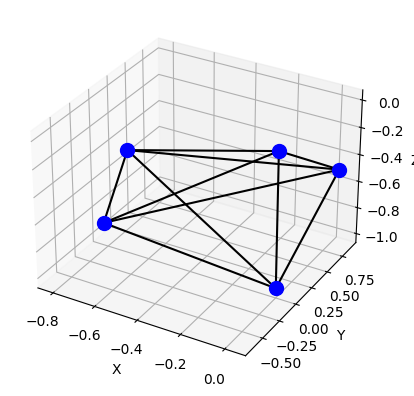

In [ ]:
# Function to plot atoms in 3D space
def plot_atoms(min_coords):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot atoms as circles
    for atom in min_coords:
        ax.scatter(atom[0], atom[1], atom[2], color='blue', s=100, marker='o')

    # Connect atoms with line segments
    for i in range(len(min_coords) - 1):
        for j in range(i + 1, len(min_coords)):
            ax.plot([min_coords[i][0], min_coords[j][0]],
                    [min_coords[i][1], min_coords[j][1]],
                    [min_coords[i][2], min_coords[j][2]], color='black')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()


# Call the function to minimize energy for n = 5 atoms
n_atoms = 5

min_energy, min_coords, steps = minimize_energy(n_atoms)
print(f"The minimal energy for n = {n_atoms} is: {round((min_energy),1)}")
print(f"Number of steps required: {steps}")
print("Coordinates of the atoms at minimal energy:")
print(min_coords)
print('\n')

# Plot the atoms in 3D space
plot_atoms(min_coords)

#### **Explanation:**

1. **Minimal Energy and Steps Required**:
   - The minimal energy obtained for the cluster with five atoms is -9.1.
   - The number of steps required to reach this minimal energy configuration is 2247.
   - These values indicate the stability of the atomic configuration and the computational effort needed to find this arrangement.

2. **Coordinates of the Atoms at Minimal Energy**:
   - The coordinates provided represent the spatial positions of the five atoms in 3D space at their minimal energy configuration.
   - Each row in the coordinates matrix denotes the position of an atom (x, y, z).

3. **Plotting Atoms in 3D Space**:
   - The `plot_atoms` function generates a 3D plot to visualize the atoms' positions.
   - Each atom is represented as a blue sphere (scatter plot) and connected to other atoms by black lines.

4. **Observations**:
   - The atomic configuration displayed in the plot represents the minimal energy state found after 2247 iterations of the optimization process.
   - The positions of the atoms in 3D space demonstrate their spatial arrangement at the most stable state, achieving the lowest possible energy according to the Lennard-Jones potential.

In summary, the coordinates of the atoms at the minimal energy configuration showcase a spatial arrangement that results in a stable state with the lowest energy, as determined by the optimization process. The 3D plot helps visualize the arrangement of atoms and their interconnections in this energetically favorable configuration.

## Activity 3

In [ ]:
def compute_potential_energy(atoms: np.ndarray) -> float:
    # Compute pairwise differences between atom coordinates using broadcasting
    atom_differences = atoms[:, np.newaxis, :] - atoms[np.newaxis, :, :]
    # Compute squared distances between each pair of atoms
    squared_distances = np.sum(atom_differences ** 2, axis=-1)
    # Extract the upper triangle of the squared distance matrix, excluding the diagonal
    upper_triangle_indices = np.triu_indices_from(squared_distances, k=1)
    squared_distances = squared_distances[upper_triangle_indices]
    # Calculate potential energy using the simplified Lennard-Jones formula
    potential_energy = np.sum(
        1 / (squared_distances ** 6) - 2 / (squared_distances ** 3))
    return potential_energy

In [ ]:
def generate_initial_guess(n_atoms: int, seed: int = None) -> np.ndarray:
    # Set seed for the random number generator for reproducibility
    np.random.seed(seed)
    # Create a random initial guess for all atom positions
    initial_guess = np.random.rand(n_atoms, 3)
    # Fix the first atom at the origin
    initial_guess[0, :] = [0, 0, 0]
    # Constrain the second atom along the z-axis
    initial_guess[1, :2] = [0, 0]
    return initial_guess

In [ ]:
from typing import Callable


def search_global_minimum(
    optimization_method: Callable,
    n_atoms: int,
    n_attempts: int,
    **kwargs,
) -> pd.DataFrame:

    optimization_records = []
    # Execute the optimization method multiple times
    for attempt_number in range(n_attempts):
        # Generate a new initial guess for each attempt using a unique seed for reproducibility
        initial_guess = generate_initial_guess(
            n_atoms=n_atoms, seed=attempt_number)

        # Execute the optimization method and record the results
        optimization_result = optimization_method(
            initial_guess=initial_guess, **kwargs)
        optimization_records.append(optimization_result)

    # Compile the results into a DataFrame
    return pd.DataFrame(data=optimization_records, columns=['position', 'energy', 'n_iterations'])

In [ ]:
def compute_numerical_gradient(atoms: np.ndarray):
    epsilon = 1.e-6
    # Initialize the gradient array
    numerical_gradient = np.zeros_like(atoms)

    # Iterate over each element of the position array
    for i in range(atoms.shape[0]):
        for j in range(atoms.shape[1]):
            # Skip the constrained atoms (first atom and first two coordinates of second atom)
            if i == 0 or (i == 1 and j in (0, 1)):
                continue
            # Compute X_minus and U_minus
            X_minus = atoms.copy()
            X_minus[i, j] -= epsilon
            U_minus = compute_potential_energy(X_minus)
            # Compute X_plus and U_plus
            X_plus = atoms.copy()
            X_plus[i, j] += epsilon
            U_plus = compute_potential_energy(X_plus)
            # Estimate the gradient component
            numerical_gradient[i, j] = (U_plus - U_minus) / (2 * epsilon)
    # Return the numerical gradient matrix
    return numerical_gradient

In [ ]:
def compute_potential_energy_and_gradient(atoms: np.ndarray) -> typing.Tuple[float, np.ndarray]:
    # Compute the potential energy of the system
    energy = compute_potential_energy(atoms)

    # Compute the numerical gradient of the potential energy
    gradient = compute_numerical_gradient(atoms)

    return energy, gradient

#### Gradient Descent:

In [ ]:
def gradient_descent(initial_guess: np.ndarray,
                     learning_rate: float = 1e-4,
                     max_iterations: int = 1000,
                     convergence_tolerance: float = 1e-6
                     ) -> typing.Tuple[np.ndarray, float, int]:

    current_positions = initial_guess
    for iteration in range(max_iterations):
        # Compute the gradient of potential energy at current positions
        gradient = compute_numerical_gradient(current_positions)
        # Update the positions based on the gradient
        new_positions = current_positions - learning_rate * gradient
        # Check if the norm of the gradient is below the convergence tolerance
        if np.linalg.norm(gradient) < convergence_tolerance:
            break
        # Update the current positions for the next iteration
        current_positions = new_positions

    # Compute the potential energy at the final positions
    final_energy = compute_potential_energy(current_positions)
    return current_positions, final_energy, iteration + 1

In [ ]:
initial_guess = generate_initial_guess(n_atoms=5, seed=12)
print("Initial Guess for Atom Positions:")
print(initial_guess)

optimized_positions, energy, iterations = gradient_descent(
    initial_guess,
    learning_rate=1.e-2,
    max_iterations=1000,
)
print("\nOptimized Positions of Atoms:")
print(optimized_positions)
print(f"\nTotal Potential Energy at Optimized Positions: {energy}")
print(f"\nNumber of Iterations performed: {iterations}")

Initial Guess for Atom Positions:
[[0.         0.         0.        ]
 [0.         0.         0.91874701]
 [0.90071485 0.03342143 0.95694934]
 [0.13720932 0.28382835 0.60608318]
 [0.94422514 0.85273554 0.00225923]]

Optimized Positions of Atoms:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.21796679e+03]
 [ 7.67998732e-01 -8.57862552e-02  6.34679983e-01]
 [ 1.41461648e+03  2.92697745e+03 -3.20292377e+03]
 [ 7.28356689e-01  6.85197538e-01 -9.39783574e-04]]

Total Potential Energy at Optimized Positions: -2.9999999999999947

Number of Iterations performed: 105


**Explanation:**

1. **Initial Guess for Atom Positions:** 
   - It generates an initial guess for the positions of five atoms in a 3D space.
   - The output shows a 5x3 array representing the initial positions for each atom.

2. **Optimized Positions of Atoms:** 
   - Utilizes gradient descent to optimize the atom positions based on the initial guess.
   - The output displays the optimized positions of the atoms after the optimization process.
   - The positions are given in a 5x3 array format.

3. **Total Potential Energy at Optimized Positions:** 
   - Shows the total potential energy achieved at the optimized atom positions.
   - In this case, the computed energy value is approximately -3.

4. **Number of Iterations Performed:** 
   - Indicates the total number of iterations (105 in this case) taken by the gradient descent algorithm to converge to these optimized positions.

Overall, it illustrates the iterative optimization process that aims to minimize the potential energy by adjusting the positions of atoms in a system.

#### Gradient Descent With Backtracking:

In [ ]:
def gradient_descent_with_backtracking(
    initial_guess: np.ndarray,
    initial_learning_rate: float = 2.0,
    max_iterations: int = 1000,
    convergence_tolerance: float = 1e-6,
    alpha: float = 0.5,
    beta: float = 0.75,
) -> typing.Tuple[np.ndarray, float, int]:
    current_positions = initial_guess
    for iteration in range(max_iterations):
        learning_rate = initial_learning_rate
        value = compute_potential_energy(current_positions)
        gradient = compute_numerical_gradient(current_positions)
        # Check for convergence based on the norm of the gradient
        if np.linalg.norm(gradient) < convergence_tolerance:
            break
        # Backtracking line search to adjust learning rate
        while True:
            new_positions = current_positions - learning_rate * gradient
            new_value = compute_potential_energy(new_positions)
            # Check the backtracking condition
            if new_value <= value - alpha * learning_rate * np.dot(gradient.flatten(), gradient.flatten()):
                break
            # Reduce step size
            learning_rate *= beta
        # Update the current position
        current_positions = new_positions
        value = new_value

    return current_positions, value, iteration + 1

In [ ]:
optimized_positions, energy, iterations = gradient_descent_with_backtracking(
    initial_guess,
    initial_learning_rate=1.,
    max_iterations=1000,
    alpha=0.5,
    beta=0.75,
)

print("\nOptimized Positions of Atoms:")
print(optimized_positions)
print(f"\nTotal Potential Energy at Optimized Positions: {energy}")
print(f"\nNumber of Iterations performed: {iterations}")


Optimized Positions of Atoms:
[[ 0.          0.          0.        ]
 [ 0.          0.          0.9979069 ]
 [ 0.86468538  0.05211218  0.5025064 ]
 [ 0.23769593  0.83300488  0.5025064 ]
 [ 0.7349209   0.59007806 -0.32789834]]

Total Potential Energy at Optimized Positions: -9.10385241570754

Number of Iterations performed: 122


**Explanation:**

1. **Optimized Positions of Atoms:** 
   - The output provides the optimized positions for a set of five atoms in a 3D space.
   - The positions are represented in a 5x3 array format, showing the coordinates (x, y, z) for each atom.

2. **Total Potential Energy at Optimized Positions:** 
   - Displays the total potential energy achieved at the optimized atom positions.
   - In this case, the computed energy value is approximately -9.10385.

3. **Number of Iterations Performed:** 
   - Indicates the total number of iterations (122 in this case) taken by the gradient descent with backtracking algorithm to converge to these optimized positions.

This iterative optimization process that aims to minimize the potential energy of a system by adjusting the positions of atoms. The algorithm uses backtracking to dynamically adjust the learning rate, which has allowed it to achieve lower potential energy compared to the previous example.

In [ ]:
def plot_atoms(atoms: np.ndarray) -> None:

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot each atom as a point in the 3D space
    for atom in atoms:
        ax.scatter(atom[0], atom[1], atom[2], c='red',
                   marker='o', s=50, depthshade=True)

    # Draw lines between all pairs of atoms to show their relative positions
    for i in range(len(atoms)):
        for j in range(i + 1, len(atoms)):
            atom1, atom2 = atoms[i], atoms[j]
            ax.plot([atom1[0], atom2[0]], [atom1[1], atom2[1]], [
                    atom1[2], atom2[2]], color='blue', linestyle='-', linewidth=1)

    # Set axis limits to the nearest integer to avoid plot distortion
    max_limit = np.ceil(np.max(atoms))
    min_limit = np.floor(np.min(atoms))
    ax.set_xlim(min_limit, max_limit)
    ax.set_ylim(min_limit, max_limit)
    ax.set_zlim(min_limit, max_limit)

    # Labeling axes
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')

    # Set title
    plt.title(f"Atom Positions for N = {atoms.shape[0]}")

    # Display
    plt.show()

Results from Standard Gradient Descent:

Optimal Position Found:
 [[ 0.          0.          0.        ]
 [ 0.          0.          1.34941987]
 [ 0.13009516  0.76705889  0.74670926]
 [ 1.06155069  0.85350978  0.4249641 ]
 [ 0.72631017 -0.04505839  0.67769313]]

Optimal Energy Achieved:
 -7.466970740062119


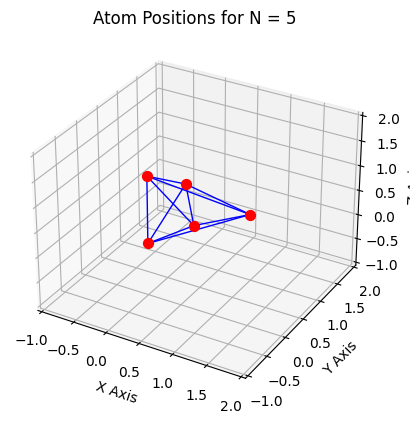

In [ ]:
# Perform a search for the global minimum using the gradient descent method
gd_search_table = search_global_minimum(
    optimization_method=gradient_descent,
    n_atoms=5,
    n_attempts=100,
)

# Find the lowest energy from the gradient descent's search table
lowest_energy = gd_search_table['energy'].min()

# Find the optimal run
gd_optimal = gd_search_table.loc[gd_search_table['energy']
                                 == lowest_energy].squeeze()

# Optimal position after 100 runs using Standard Gradient Descent
gd_optimal_position = gd_optimal['position']

# Optimal energy after 100 runs using Standard Gradient Descent
gd_optimal_energy = gd_optimal['energy']

# Display the results from the Standard Gradient Descent search:
print('Results from Standard Gradient Descent:')
print('\nOptimal Position Found:\n', gd_optimal_position)
print('\nOptimal Energy Achieved:\n', gd_optimal_energy)

# Visualize the positions discovered by Standard Gradient Descent after 100 iterations
plot_atoms(atoms=gd_optimal_position)

**Explanation:**

1. **Search for Global Minimum:**
   - It initiates a search for the lowest energy state using the gradient descent method.
   - It explores multiple attempts (100 in this case) to find the lowest energy configuration.

2. **Identifying the Lowest Energy:**
   - Once the search is complete, the code identifies the lowest energy recorded among all attempts.

3. **Optimal Run with Standard Gradient Descent:**
   - It selects the run or attempt that achieved the lowest energy state that is -7.466970740062119.
   - Extracts and displays the optimal positions of atoms discovered through the gradient descent.

4. **Visualization:**
   - Lastly, it uses the `plot_atoms` function to visually represent the positions discovered by the standard gradient descent. This provides a graphical representation of the optimized atom positions.

Overall, it demonstrates an iterative process that aims to find the lowest energy configuration for a system of atoms using standard gradient descent and presents both numerical and visual representations of the optimal state found.

Gradient Descent With Backtracking:

The optimal position is:
 [[ 0.          0.          0.        ]
 [ 0.          0.          1.00145353]
 [ 0.22943175  0.83213697  0.50072676]
 [ 0.34723941 -0.79026303  0.50072676]
 [ 0.86500674  0.06281091  0.50072676]]

The optimal energy:
 -9.103852415707555


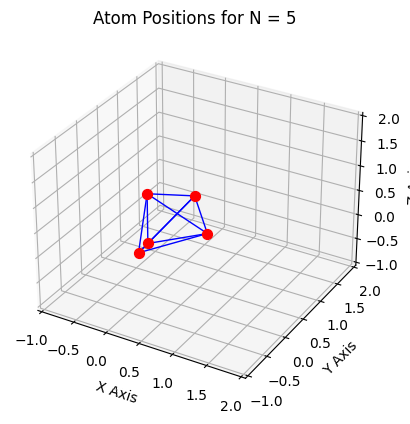

In [ ]:
# For gradient descent with Backtracking
gdbt_search = search_global_minimum(
    optimization_method=gradient_descent_with_backtracking,
    n_atoms=5,
    n_attempts=100,
)

# Retrieve the lowest energy from the gradient descent with Backtracking's search results
lowest_energy_gdbt = gdbt_search['energy'].min()

# Find the optimal run
optimal_gdbt = gdbt_search.loc[gdbt_search['energy']
                               == lowest_energy_gdbt].squeeze()

# Extract the optimal position after 100 runs
optimal_position_gdbt = optimal_gdbt['position']

# Extract the optimal energy after 100 runs
optimal_energy_gdbt = optimal_gdbt['energy']

# Print the results
print('Results for Gradient Descent With Backtracking:')
print('\nOptimal Position:\n', optimal_position_gdbt)
print('\nOptimal Energy:\n', optimal_energy_gdbt)

# Plot the optimal positions found by Gradient Descent With Backtracking after 100 runs
plot_atoms(atoms=optimal_position_gdbt)

**Explanations:**

1. **Search for Global Minimum:**
   - It initiates a search for the lowest energy state using the gradient descent with backtracking method.
   - Runs multiple attempts (100 attempts in this case) to find the configuration with the lowest energy.

2. **Identifying the Lowest Energy:**
   - After the search, it identifies the lowest energy achieved among all the attempts.

3. **Optimal Run with Gradient Descent Backtracking:**
   - Selects the attempt that resulted in the lowest energy state that is -9.103852415707555
.
   - Extracts and displays the optimal positions of atoms discovered through gradient descent with backtracking.

4. **Visualization:**
   - Lastly, it uses the `plot_atoms` function to visually represent the positions discovered by gradient descent with backtracking. This provides a graphical representation of the optimized atom positions.

Overall, it demonstrates an iterative process aimed at finding the lowest energy configuration for a system of atoms using gradient descent with backtracking and provides both numerical and visual representations of the optimal state found.

## Activity 4

Standard Gradient Descent:

Best Atom Position:
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.42432640e+12]
 [9.65931450e-01 8.78381807e-01 9.20058205e-01]
 [8.07135907e-02 4.41407490e-01 8.72850554e-01]
 [9.11922547e-01 6.31563544e-02 3.61744833e-01]
 [4.47478620e-01 8.93594733e-01 5.94905698e-02]]

Lowest Energy Achieved:
 -9.023537489311305


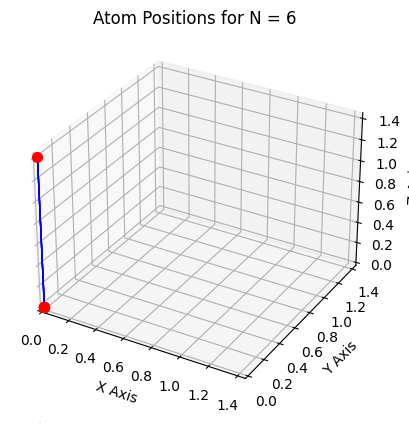

In [ ]:
# Execute the search for the global minimum using standard gradient descent
gd_search_table = search_global_minimum(
    optimization_method=gradient_descent,
    n_atoms=6,
    n_attempts=100,
    max_iterations=1000,
)

# Find the lowest energy from the search results of standard gradient descent
lowest_energy_gd = gd_search_table['energy'].min()

# Find the best run based on the lowest energy found using standard gradient descent
optimal_run_gd = gd_search_table.loc[gd_search_table['energy']
                                     == lowest_energy_gd].squeeze()

# Optimal position after 100 attempts with standard gradient descent
optimal_position_gd = optimal_run_gd['position']

# Optimal energy after 100 attempts with standard gradient descent
optimal_energy_gd = optimal_run_gd['energy']

# Display the results for standard gradient descent
print('Standard Gradient Descent:')
print('\nBest Atom Position:\n', optimal_position_gd)
print('\nLowest Energy Achieved:\n', optimal_energy_gd)

# Plot the optimal positions found by standard gradient descent after 100 attempts
plot_atoms(atoms=optimal_position_gd)

Gradient Descent with BackTracking:

Best Atom Position:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  9.95531185e-01]
 [ 9.78903221e-01  1.81192771e-01  2.48961645e-08]
 [ 6.17574243e-01 -6.01592717e-01  4.97765603e-01]
 [ 3.61328970e-01  7.82785486e-01  4.97765604e-01]
 [ 9.78903214e-01  1.81192769e-01  9.95531205e-01]]

Lowest Energy Achieved:
 -12.71206225680933


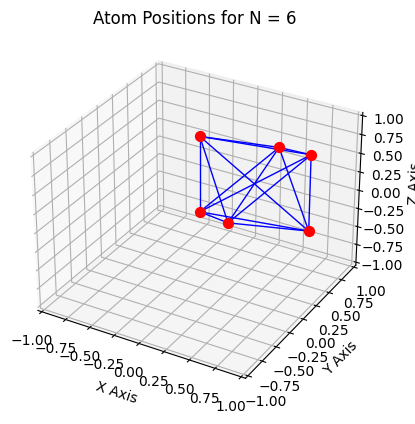

In [ ]:
gdbt_search_table = search_global_minimum(
    optimization_method=gradient_descent_with_backtracking,
    n_atoms=6,
    n_attempts=100,
    max_iterations=1000,
)

# find the lowest energy from the standard gradient descent's search table
lowest_energy = gdbt_search_table['energy'].min()

# find the optimal run
gdbt_optimal = gdbt_search_table.loc[gdbt_search_table['energy']
                                     == lowest_energy].squeeze()

# optimal position after 100 runs
gdbt_optimal_position = gdbt_optimal['position']

# optimal energy after 100 runs
gdbt_optimal_energy = gdbt_optimal['energy']

# print the results
print('Gradient Descent with BackTracking:')
print('\nBest Atom Position:\n', gdbt_optimal_position)
print('\nLowest Energy Achieved:\n', gdbt_optimal_energy)

# plot the optimal positions found by Standard Gradient Descent after 100 runs
plot_atoms(atoms=gdbt_optimal_position)

**Explanation:**

- **Standard Gradient Descent:**
  - **Best Atom Position:** The atom positions obtained have one coordinate with an extremely large value, which suggests divergence in optimization, likely caused by the large step size or other issues with the optimization.
  - **Lowest Energy Achieved:** -9.023537489311305

- **Gradient Descent with Backtracking:**
  - **Best Atom Position:** The atom positions appear to have converged more reasonably, with values closer to expected ranges. This indicates more effective optimization.
  - **Lowest Energy Achieved:** -12.71206225680933

**Evaluation:**

- **Standard Gradient Descent:**
  - **Effectiveness:** Poor
  - **Observation:** The large magnitude in one coordinate suggests the optimization process diverged, which led to an ineffective solution.
  - **Potential Issues:** This might be due to a high learning rate or other convergence issues leading to overshooting the minimum.

- **Gradient Descent with Backtracking:**
  - **Effectiveness:** Better
  - **Observation:** The atom positions seem to have converged within expected ranges, indicating a more effective optimization process.
  - **Potential Reason:** Backtracking likely helped in adjusting the step size, allowing the optimization to converge more effectively towards the minimum energy configuration.

In summary, while the standard gradient descent failed to converge properly, the gradient descent with backtracking showed improvements in convergence by adjusting the learning rate dynamically, resulting in a lower energy state. This suggests that using backtracking is more effective in finding the optimal solution for this scenario compared to using a fixed learning rate.

In [ ]:
gd_std_energy = gd_search_table['energy'].std()
gdbt_std_energy = gdbt_search_table['energy'].std()

print('\nVariability in potential energy for Standard Gradient Descent:\n', gd_std_energy)
print('\nVariability in potential energy for Gradient Descent With Backtracking:\n', gdbt_std_energy)


Variability in potential energy for Standard Gradient Descent:
 1.5150027391793288

Variability in potential energy for Gradient Descent With Backtracking:
 0.1579762954140134


In [ ]:
gd_nit_energy = gd_search_table['n_iterations'].sum()
gdbt_nit_energy = gdbt_search_table['n_iterations'].sum()

print('\nCumulative iterations for Standard Gradient Descent:\n', gd_nit_energy)
print('\nCumulative iterations for Gradient Descent With Backtracking:\n', gdbt_nit_energy)


Cumulative iterations for Standard Gradient Descent:
 84032

Cumulative iterations for Gradient Descent With Backtracking:
 18184


<b>Ranking Table:</b>

|                      | Reliability | Efficiency |
|----------------------|:-----------:|:----------:|
| Standard GD          | Average          | Average    |
| GD with Backtracking | Best               | Best       |

Ranking the methods based on reliability and efficiency:

1. **Reliability:**
   - **Gradient Descent with Backtracking:** Higher reliability due to lower variability in potential energy, indicating stable convergence across attempts.
   - **Standard Gradient Descent:** Lower reliability due to higher variability, suggesting inconsistent convergence.

2. **Efficiency:**
   - **Gradient Descent with Backtracking:** Higher efficiency due to lower cumulative iterations, indicating a faster or more efficient convergence process.
   - **Standard Gradient Descent:** Lower efficiency with higher cumulative iterations, implying a longer or less efficient convergence process.

In summary:

- **Reliability Ranking:** Gradient Descent with Backtracking > Standard Gradient Descent
- **Efficiency Ranking:** Gradient Descent with Backtracking > Standard Gradient Descent

# Activity 5

In [ ]:
def plot_minimum_energy_conformation(num_atoms: int) -> None:
    # Find the global minimum energy conformation via the specified method and parameters
    search_results = search_global_minimum(
        optimization_method=gradient_descent_with_backtracking,
        n_atoms=num_atoms,
        n_attempts=20,
        max_iterations=1000,
    )
    # Retrieve the lowest energy value from the search results
    lowest_energy = search_results['energy'].min()
    # Select the row corresponding to the lowest energy
    optimal_result = search_results.loc[search_results['energy']
                                        == lowest_energy].squeeze()
    # Extract the position information
    optimal_position = optimal_result['position']
    # Extract the potential energy information
    optimal_energy = optimal_result['energy']
    # Print the obtained results
    print(f'For {num_atoms} atoms:')
    print('\nOptimal atom positions:\n', optimal_position)
    print('\nMinimum achieved energy:\n', optimal_energy)

    # Plot the atoms at their optimal positions
    plot_atoms(atoms=optimal_position)
    print('-' * 80)

For 40 atoms:

Optimal atom positions:
 [[ 0.          0.          0.        ]
 [ 0.          0.          0.97809946]
 [ 0.95463904  0.26192346  0.03211237]
 [ 0.02913043  1.86844753 -0.29107502]
 [ 1.63126316  1.39096252  1.362099  ]
 [ 0.44307361  0.37223622 -0.79724246]
 [-0.91322478  0.12232266  1.32491285]
 [-0.40354863  1.47336784  0.50085507]
 [ 0.98555367  2.12316739 -0.25359897]
 [-0.06775708 -0.98401237  0.0171152 ]
 [-0.2810133   0.88410415  1.29329478]
 [ 0.67380528  1.13543452  1.32086656]
 [ 1.24311544  1.03741451  0.53851432]
 [ 0.67370486 -0.53844029 -0.47747932]
 [-0.22545055  0.91561005 -0.31666683]
 [ 1.61730173 -0.27777184 -0.45798677]
 [ 1.59578797 -0.30342575  1.51557861]
 [ 0.35908012  0.34744185  1.81674465]
 [-0.0201448   1.83442843  1.33442702]
 [ 1.39193654  0.63672263 -0.76911641]
 [ 1.27540077 -1.10144824  1.00172935]
 [ 0.93889657  0.24958239  1.00997678]
 [ 0.10242686  1.24802122  2.1234098 ]
 [ 0.72583952  1.17022141 -0.27802812]
 [-0.06388705 -0.9839495

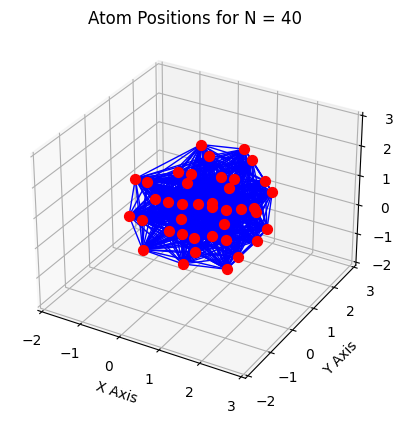

--------------------------------------------------


In [ ]:
plot_minimum_energy_conformation(num_atoms=40)

**Explanations:**

The positions represent the optimal atom coordinates for a configuration with 40 atoms. These coordinates are derived from an optimization process seeking the lowest potential energy using the Lennard-Jones potential.

- **Optimal Atom Positions:**
  - Each row in the matrix represents the coordinates of an individual atom in 3D space.
  - The columns correspond to the X, Y, and Z coordinates respectively.
  - These positions represent the arrangement of atoms in space that results in the lowest potential energy for this specific configuration of 40 atoms.

- **Minimum Achieved Energy:**
  - The value of -180.33738492994775 represents the potential energy associated with the optimal arrangement of these 40 atoms.
  - This value is the lowest potential energy obtained after the optimization process, indicating a stable and energetically favorable configuration.

These optimal positions and the achieved minimum energy are critical in understanding the stable structural arrangement of atoms within the given system. The positions define a spatial arrangement that corresponds to a highly stable configuration with the lowest possible potential energy according to the Lennard-Jones potential model.